### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

Independent variable: Congruence of words
<br>
Dependent variable: Response time

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

We want to see if there is a difference in response time when participants are shown words in different considitions, in this case, words whose names match the colors in which they are printed and words whose names do not match the colors in which they are printed.

We can run a hypothesis testing on the mean response time associated with each condition and see if there is a difference. The hypotheses should be set up as the followings (µ here represents average response time):

H0: **$µ_{incongruent}$** = **$µ_{congruent}$**
<br>
H1: **$µ_{incongruent}$** ≠ **$µ_{congruent}$**

And we are going to perform a paired t-test as this is a comparison of two different methods of measurement where the measurements are applied to the same subjects.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
### Import packages that are needed for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
### Preliminary investigation on the dataset

df = pd.read_csv('stroopdata.csv')

df.isnull().any()

Congruent      False
Incongruent    False
dtype: bool

In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
### Get the inter-quatile range

print(st.iqr(df.Congruent), st.iqr(df.Incongruent))

4.3055 5.33475


Text(0,0.5,'Response Time (Second)')

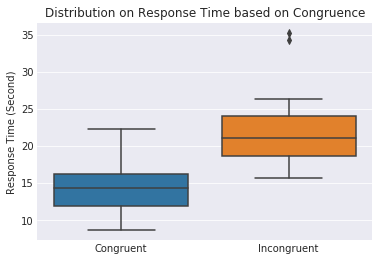

In [5]:
sns.boxplot(data=df)
plt.title('Distribution on Response Time based on Congruence')
plt.ylabel('Response Time (Second)')

Based on the preliminary investigation, people obviously need more time to respond when being shown incongruent words. On average, they need about 8 more seconds to respond. There is also a greater standard deviation when people see incongruent words. The SD is about 1.2 higher. On top of that, the inter-quatile range is 5.335 seconds (Incongruent), compared to 4.3055 seconds (Congruent). In a nutshell, there is a greater spread with incongruence.

If we dive deeper and look at the boxplot, we can see that the congruent group performs obviously better than the incongruent group do, in a sense of response time. 75% participants of the congruent group responded at a time which only less than 25% participants of the incongruent group could do.

Although at this point we cannot draw any conslusions yet, this first glance of the dataset already gives us a general idea of the impact of congruence on people's response time.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'Response Time (Second)')

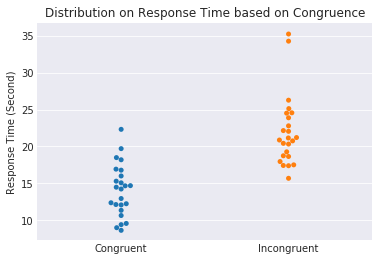

In [6]:
### Build the visualizations here

sns.swarmplot(data=df)
plt.title('Distribution on Response Time based on Congruence')
plt.ylabel('Response Time (Second)')

The swarmplot aligns with the boxplot above which shows that people obviously need more time to respond when being shown incongruent words.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [7]:
### 95% Confidence level and its associated critical values

st.t.interval(alpha=0.95, df=23)

(-2.0686576104190406, 2.0686576104190406)

In [8]:
### 99% Confidence level and its associated critical values

st.t.interval(alpha=0.99, df=23)

(-2.8073356837675227, 2.8073356837675227)

In [ ]:
### T-statistic and P-value

t_stat, p_val = st.ttest_rel(df.Incongruent, df.Congruent)

print('t-statistic = %6.3f, p-value = %6.4f' % (t_stat, p_val))

The t-statistic is equal to 8.021. This test statistic tells us how much the sample mean deviates from the null hypothesis. 

If the t-statistic lies outside the quantiles (Critical values) of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis.

A p-value of 0.0000 means we'd expect to see data as extreme as our sample due to chance about basically 0% of the time assuming the null hypothesis is true. 

In this case, the p-value is lower than our significance level α (1 - confidence level or 0.05, even 0.01) so we should reject the null hypothesis.